In [24]:
import tensorflow as tf

a = tf.constant(5.0)
b = tf.constant(3.0)

c = a + b

with tf.Session() as s:
    print(s.run(c))
    s.run(c)

8.0


In [32]:
import numpy as np

# Y = X + 10 * cos(X/5)

X_gen = np.arange(100, step=.1)
Y_gen = X_gen + 10 * np.cos(X_gen/5)


n_samples = 1000
batch_size = 100
steps_number = 2000

X_gen = np.reshape(X_gen, (n_samples, 1))
Y_gen = np.reshape(Y_gen, (n_samples, 1))


In [34]:
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
Y = tf.placeholder(tf.float32, shape=(batch_size, 1))


# with tf.variable_scope("lr"):
#     k = tf.get_variable("weights", (1,1), initializer=tf.random_normal_initializer())
#     b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer())

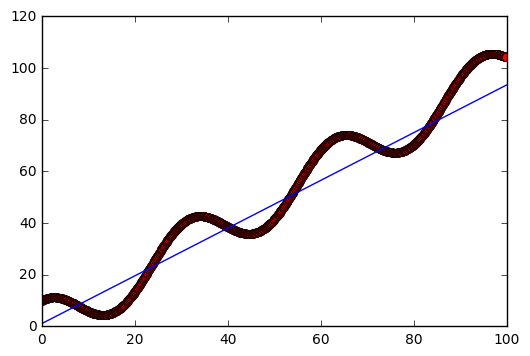

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

y_predicted = tf.matmul(X, k) + b
loss = tf.reduce_sum((Y - y_predicted)**2)

opt_operation = tf.train.AdamOptimizer().minimize(loss)

with tf.Session() as ses:
    ses.run(tf.initialize_all_variables())
    
    for i in range(steps_number):
        indicies = np.random.choice(n_samples, batch_size)
        X_batch, Y_batch = X_gen[indicies], Y_gen[indicies]
        
        ses.run([opt_operation, loss], feed_dict = {X: X_batch, Y: Y_batch })
        
    plt.plot(X_gen, Y_gen, 'ro')
    plt.plot(X_gen, ses.run(k) * X_gen + ses.run(b))

    ses.close()